# 3.6 Lab: Linear Regression

## Table of Contents

* [3.6.2 Simple Linear Regression](#slr)
* [3.6.3 Multiple Linear Regression](#mlr)
* [3.6.4 Interaction Terms](#interaction)
* [3.6.5 Non-linear transformation of the Predictors](#non-linear)
* [3.6.6 Qualitative Predictors](#qualpred)
* [3.7 Exercises](#exercises)

In [2]:
library(MASS)
library(ISLR)

## 3.6.2 Simple Linear Regression <a name="slr"></a>

The MASS library contains the Boston data set, which records medv (median house value) for 506 neighborhoods around Boston. We will seek to predict medv using 13 predictors such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low
socioeconomic status).

Let's find out more about the dataset.

In [3]:
?Boston

Boston {MASS},R Documentation


In [4]:
# check dataset in a data editor
fix(Boston)

In [5]:
# check columns
attach(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

We will start by using the `lm()` function to fit a simple linear regression `lm()` model, with medv as the response and lstat as the predictor. The basic syntax is `lm(y∼x,data)` , where `y` is the response, `x` is the predictor, and data is the data set in which these two variables are kept.

In [6]:
lm.fit=lm(medv∼lstat ,data=Boston)

If we type `lm.fit` , some basic information about the model is output. For more detailed information, we use `summary(lm.fit)`. This gives us p-values and standard errors for the coefficients, as well as the R2 statistic and F-statistic for the model.

In [7]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [8]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can use the names() function in order to find out what other pieces `names()`
of information are stored in `lm.fit`. Although we can extract these quantities by name—e.g. `lm.fit$coefficients` — it is safer to use the extractor functions like `coef()` to access them.

In [9]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In order to obtain a confidence interval for the coefficient estimates, we can use the `confint()` command.

In [10]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`

In [11]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="confidence")

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


In [12]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="prediction")

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


For instance, the 95% confidence interval associated with a `lstat` value of 10 is (24.47,25.63), and the 95% prediction interval is (12.828,37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for `medv` when `lstat` equals 10), but the latter are substantially wider.

We will now plot `medv` and `lstat` along with the least squares regression line using the plot() and abline() functions.

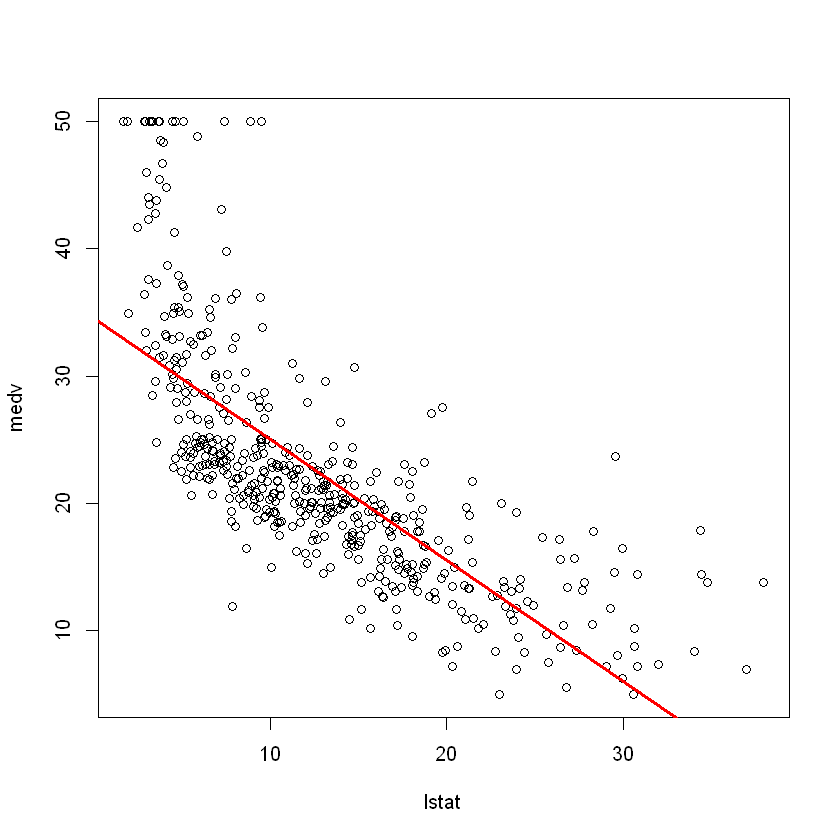

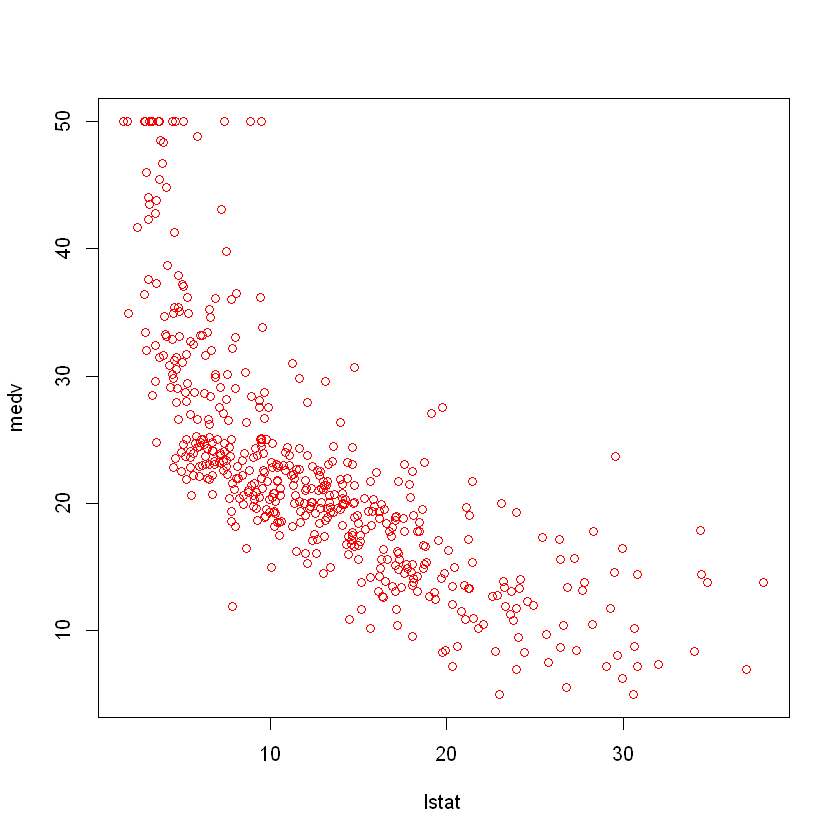

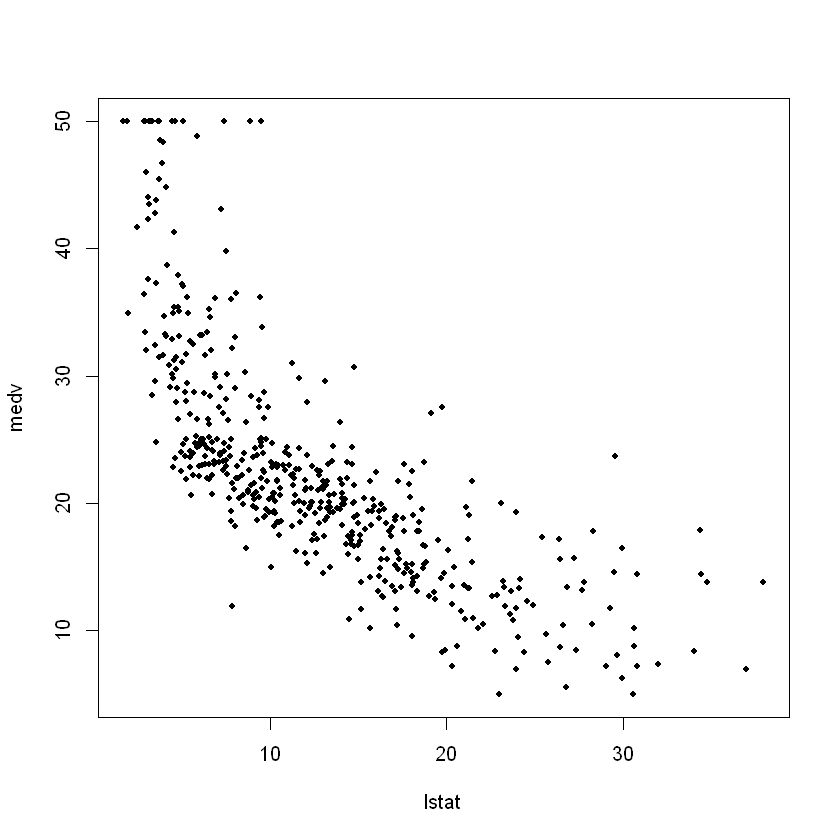

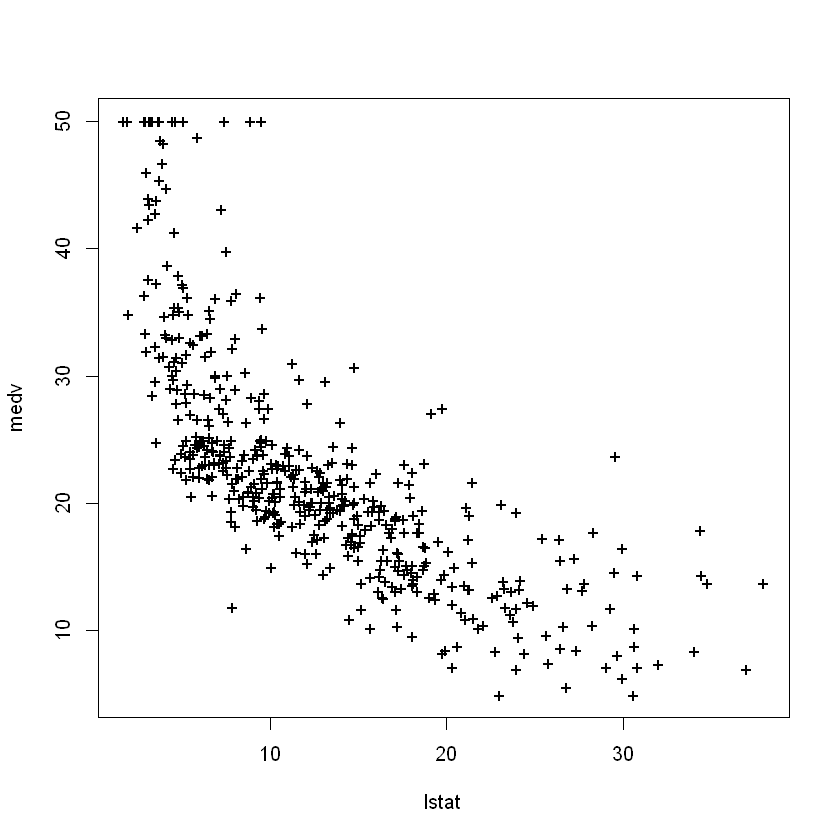

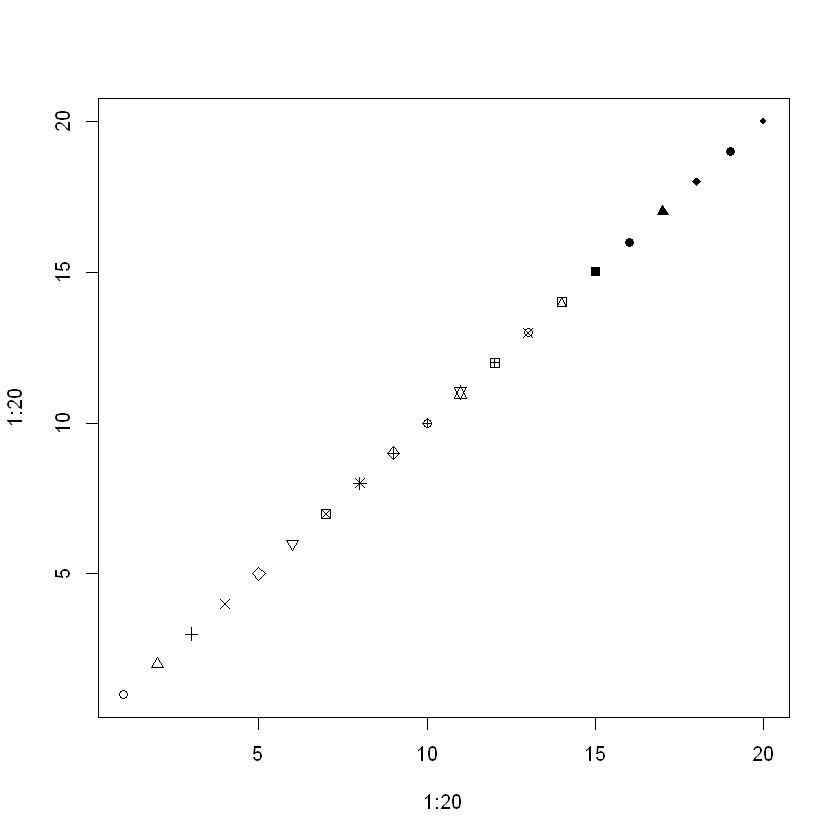

In [13]:
plot(lstat ,medv)
abline(lm.fit)
abline(lm.fit, lwd=3)
abline(lm.fit, lwd=3, col="red")
plot(lstat, medv, col="red")
plot(lstat, medv, pch=20)
plot(lstat, medv, pch="+")
plot(1:20, 1:20, pch=1:20)

There is some evidence for non-linearity in the relationship between `lstat` and `medv` . We will explore this issue later in this lab. The `abline()` function can be used to draw any line, not just the least squares regression line. To draw a line with intercept `a` and slope `b` , we type `abline(a,b)`. Above we experiment with some additional settings for plotting lines and points. The `lwd=3` command causes the width of the regression line to be increased by a factor of 3; this works for the `plot()` and `lines()` functions also. We can also use the `pch` option to create different plotting symbols.

However, it is often convenient to view all four plots together. We can achieve this by using the `par()` function, which tells R to split the display screen into separate panels so that multiple plots can be viewed simultaneously.

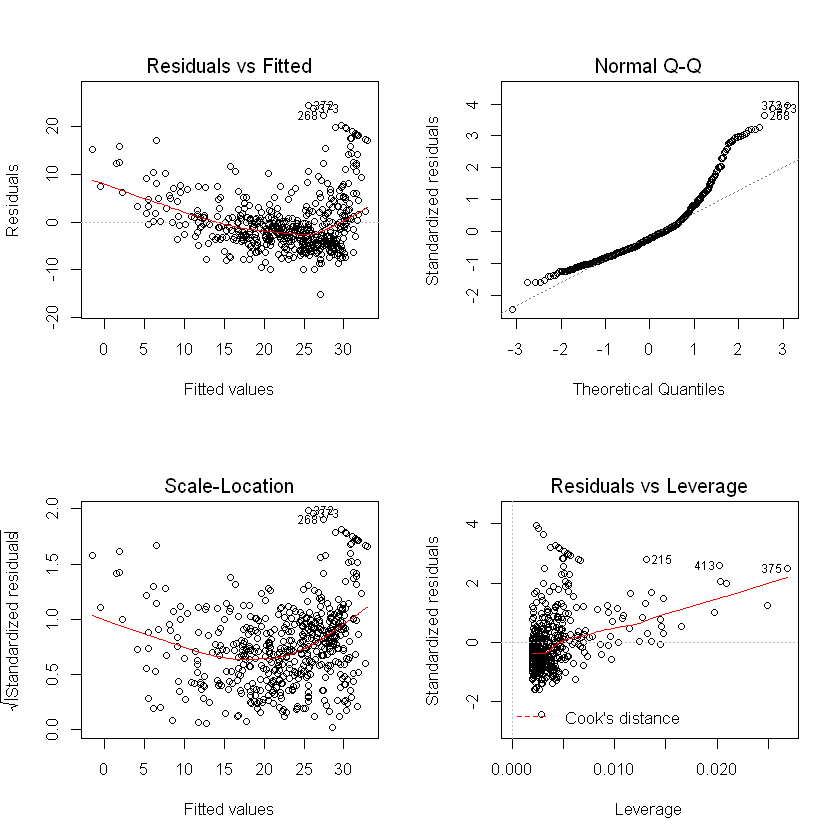

In [14]:
par(mfrow=c(2,2))
plot(lm.fit)

Alternatively, we can compute the residuals from a linear regression fit using the `residuals()` function. The function `rstudent()` will return the studentized residuals, and we can use this function to plot the residuals against the fitted values.

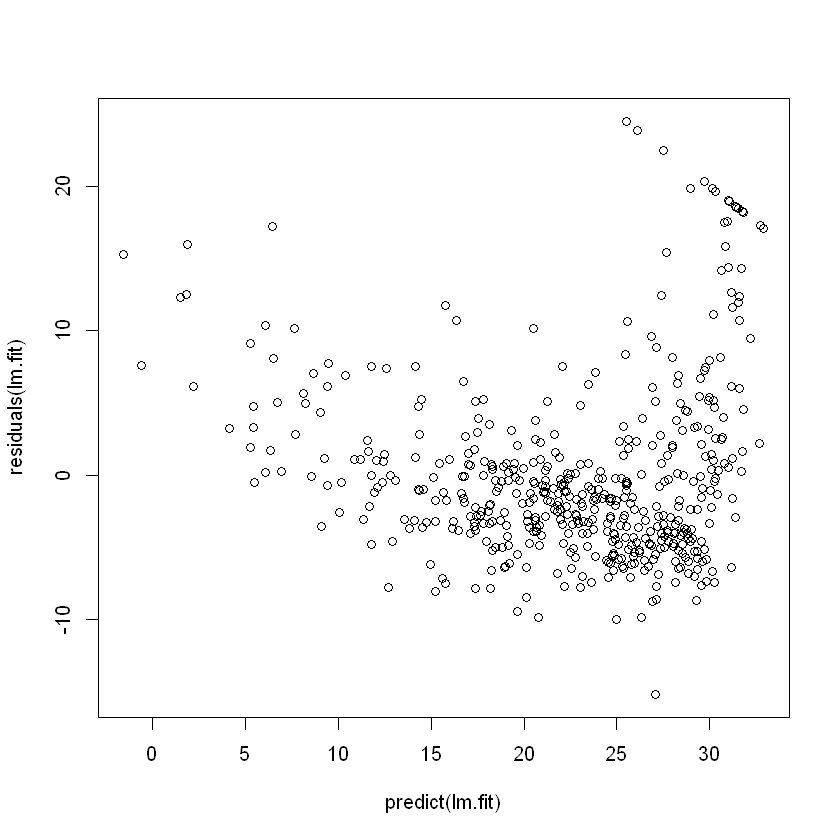

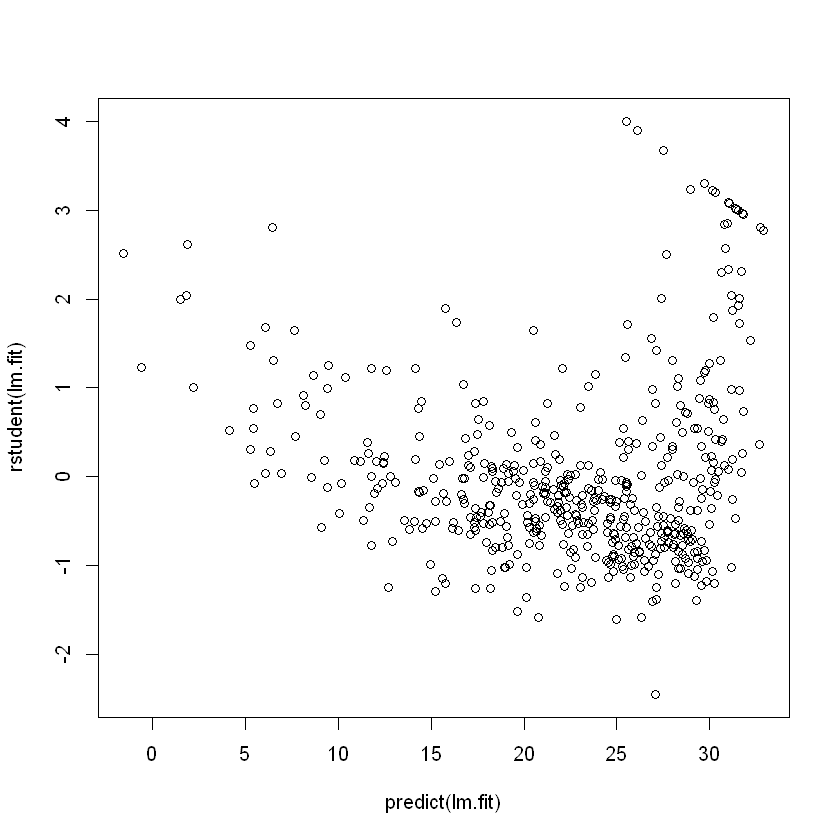

In [15]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics can be computed for any number of predictors using the
`hatvalues()` function

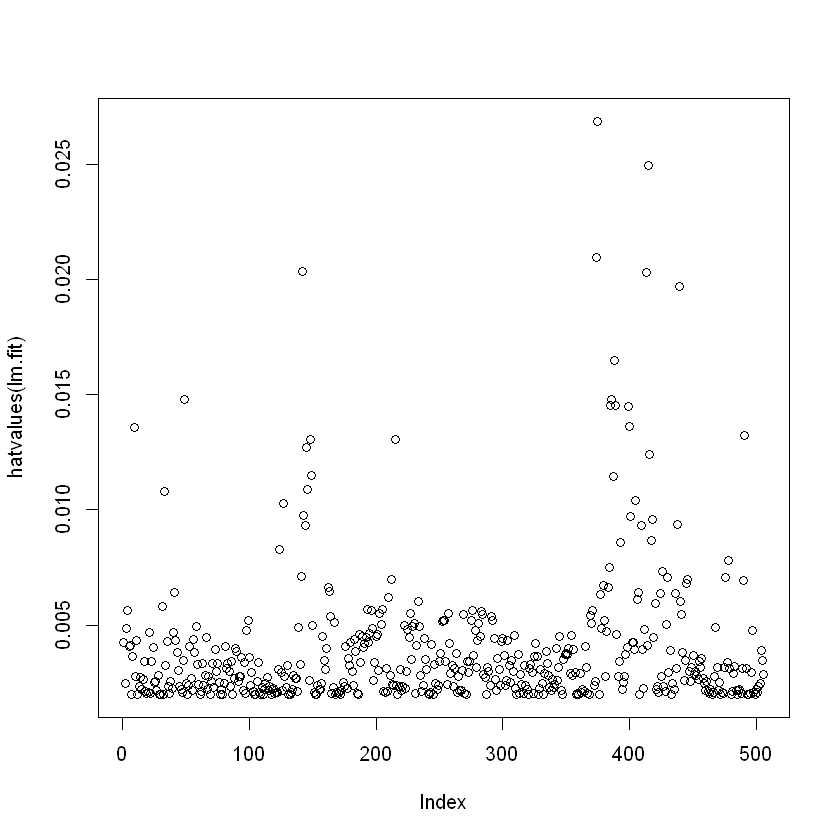

In [16]:
plot(hatvalues (lm.fit))

In [17]:
which.max(hatvalues (lm.fit))

375 
375

The `which.max()` function identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage
statistic.

## 3.6.3 Multiple Linear Regression <a name="mlr"></a>

In order to fit a multiple linear regression model using least squares, we again use the `lm()` function. The syntax `lm(y∼x1+x2+x3)` is used to fit a model with three predictors, x1, x2, and x3 . The `summary()` function now outputs the regression coefficients for all the predictors.

In [18]:
lm.fit=lm(medv∼lstat+age ,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The `Boston` data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [19]:
lm.fit=lm(medv∼.,data=Boston)

In [20]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

We can access the individual components of a summary object by name (type `?summary.lm` to see what is available). Hence `summary(lm.fit)$r.sq`
gives us the R2 , and `summary(lm.fit)$sigma` gives us the RSE. The `vif()` `vif()` function, part of the car package, can be used to compute variance inflation factors. Most VIF’s are low to moderate for this data. The car package is not part of the base R installation so it must be downloaded the first time you use it via the `install.packages` option in R.

In [21]:
library(car)
vif(lm.fit)

Loading required package: carData


crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, `age` has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except `age`

In [22]:
lm.fit1=lm(medv∼.-age ,data=Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

Alternatively, the `update()` function can be used.

In [23]:
lm.fit1=update(lm.fit , ∼.-age)
summary(lm.fit1)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.

## 3.6.4 Interaction Terms <a name="interaction"></a>

It is easy to include interaction terms in a linear model using the `lm()` func-tion. The syntax `lstat:black` tells R to include an interaction term between `lstat` and `black` . The syntax `lstat*age` simultaneously  includes `lstat` , `age`,and the interaction term `lstat × age` as predictors; it is a shorthand for `lstat+age+lstat:age`

In [24]:
summary(lm(medv∼lstat*age,data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## 3.6.5 Non-linear transformation of the Predictors <a name="non-linear"></a>

The `lm()` function can also accommodate non-linear transformations of the predictors. For instance, given a predictor `X`, we can create a predictor `X2` using `I(X^2)` . The function `I()` is needed since the `^` has a special meaning `I()` in a formula; wrapping as we do allows the standard usage in R , which is to raise `X` to the power 2 . We now perform a regression of medv onto lstat and `lstat^2`.

In [25]:
lm.fit2=lm(medv∼lstat+I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the `anova()` function to furtherquantify the extent to which the quadratic fit is superior to the linear fit.

In [26]:
lm.fit=lm(medv∼lstat)
anova(lm.fit ,lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, lstat , while Model 2 corresponds to the larger quadratic model that has two predictors, `lstat` and `lstat 2` . The `anova()` function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors `lstat` and `lstat 2` is far superior to the model that only contains the predictor `lstat`. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv` and `lstat`. If we type

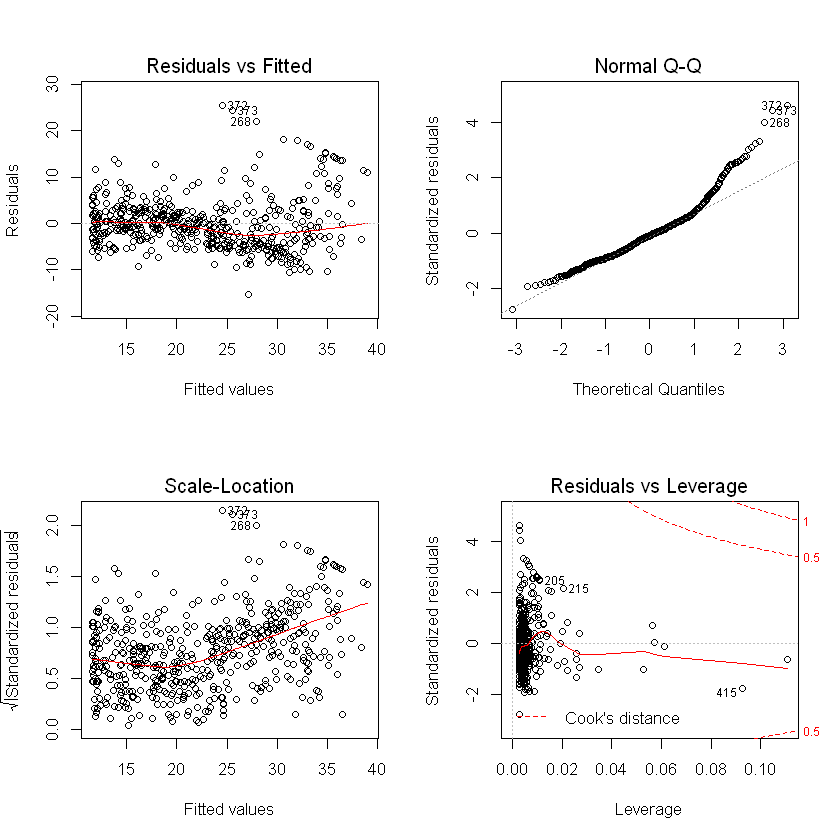

In [27]:
par(mfrow=c(2,2))
plot(lm.fit2)

then we see that when the `lstat^2` term is included in the model, there is little discernible pattern in the residuals. In order to create a cubic fit, we can include a predictor of the form `I(X^3)`. However, this approach can start to get cumbersome for higher-order polynomials. A better approach involves using the `poly()` function to create the polynomial within `lm()`. For example, the following command produces a fifth-order polynomial fit:

In [28]:
lm.fit5=lm(medv∼poly(lstat ,5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [29]:
summary(lm(medv∼log(rm),data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


## 3.6.6 Qualitative Predictors <a name="qualpred"></a>

We will now examine the `Carseats` data, which is part of the ISLR library. We will attempt to predict `Sales` (child car seat sales) in 400 locations based on a number of predictors.

In [30]:
fix(Carseats)

In [31]:
names(Carseats )

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

The `Carseats` data includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor `Shelveloc` takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as `Shelveloc`, R generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [32]:
lm.fit=lm(Sales∼.+Income:Advertising+Price:Age, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The `contrasts()` function returns the coding that R uses for the dummy variables.

In [33]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Use `?contrasts` to learn about other contrasts, and how to set them. R has created a `ShelveLocGood` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a `ShelveLocMedium` dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for `ShelveLocGood` in the regression output is positive indicates that a good shelving location is  associated with high sales (relative to a bad location). And `ShelveLocMedium` has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.

## 3.7 Exercises <a name="exercises"></a>

### Question 9
This question involves the use of multiple linear regression on the `Auto` data set.
    
* (a) Produce a scatterplot matrix which includes all of the variables in the data set.
* (b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, `cor()` which is qualitative.
* (c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance: 
    * i. Is there a relationship between the predictors and the response?
    * ii. Which predictors appear to have a statistically significant relationship to the response?
    * iii. What does the coefficient for the year variable suggest?
* (d)  Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
* (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
* (f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt(X)$, $X^2$ . Comment on your findings.

In [34]:
library(MASS)
library(ISLR)

# load the Auto dataset
attach(Auto)

In [35]:
# let's explore more our dataset
?Auto

Auto {ISLR},R Documentation


#### (a) Solution

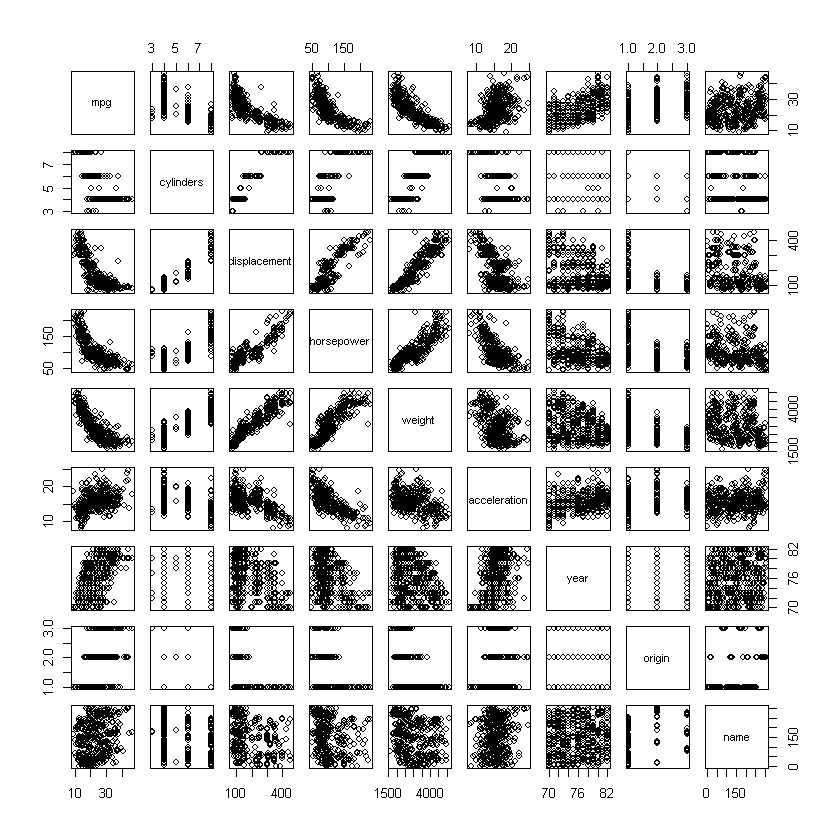

In [36]:
plot(Auto)

#### (b) Solution

In [37]:
cor(Auto[, names(Auto) != 'name'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


#### (c) Solution

In [38]:
lm.fit = lm(mpg~.-name, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


------

##### (i) Answer to **Is there a relationship between the predictors and the response?**

This question can be answered by testing the hypothesis that $H_0 : \beta_{cylinders} = \beta_{displacement} = ... = \beta_{origin}$.

The above F-statistic helps us to determine whether or not we should reject the $H_0$ or not. In our case the p-value of F-statistic is very low, which means that there is a relationship between the predictors and response.

_________

##### (ii) Answer to **Which predictors appear to have a statistically significant relationship to the response?**

To answer this question we simply look at p-values of each of the predictors. We can observe that with significance level of 5% all of the predictors have statisticall significant relationship except:
* cylinders
* horsepower
* acceleration

_____

##### (iii) Answer to **What does the coefficient for the year variable suggest?**

The statistical significance of the year predictor in our linear model indicates that there is a positive relationship between the year of the model of the car and its mileage.

---

##### (d) Solution

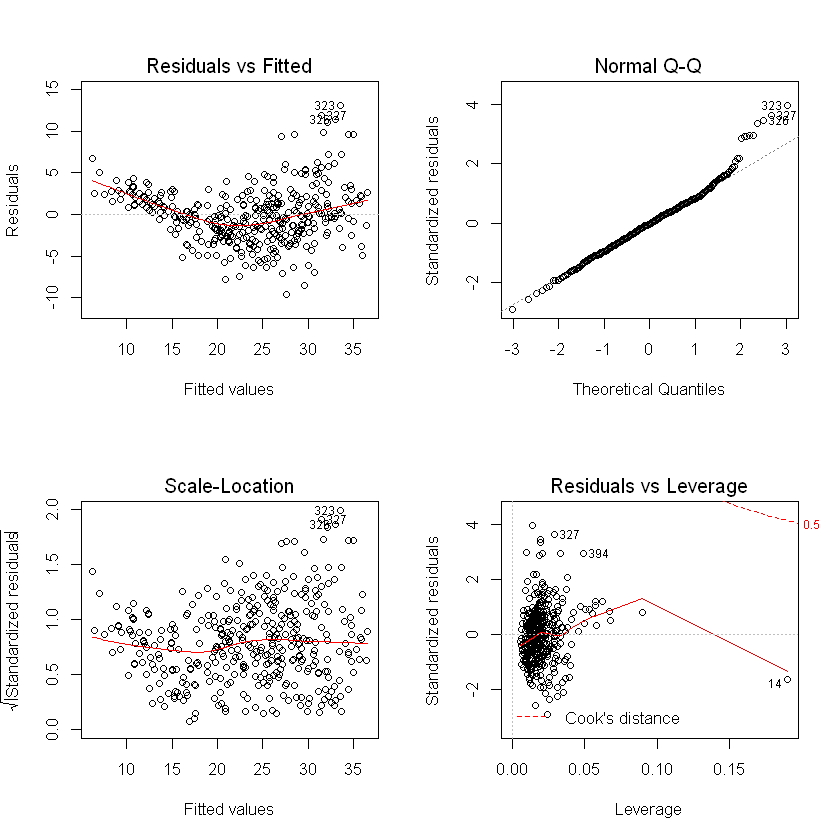

In [39]:
par(mfrow=c(2,2))
plot(lm.fit)

On the basis of residual plots we can observe some non-linearity. Question, __would need more explanation__

The leverage plot does show us that there are values with unusually high values.

##### (e) Solution

In [40]:
lm.fit_inter = lm(mpg~.-name+displacement:weight, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9027 -1.8092 -0.0946  1.5549 12.1687 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.389e+00  4.301e+00  -1.253   0.2109    
cylinders            1.175e-01  2.943e-01   0.399   0.6899    
displacement        -6.837e-02  1.104e-02  -6.193 1.52e-09 ***
horsepower          -3.280e-02  1.238e-02  -2.649   0.0084 ** 
weight              -1.064e-02  7.136e-04 -14.915  < 2e-16 ***
acceleration         6.724e-02  8.805e-02   0.764   0.4455    
year                 7.852e-01  4.553e-02  17.246  < 2e-16 ***
origin               5.610e-01  2.622e-01   2.139   0.0331 *  
displacement:weight  2.269e-05  2.257e-06  10.054  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.964 on 383 degrees of freedom
Multiple R-squared:  0.8588,	Adjusted R-squared:  0.8558 
F-stati

In [41]:
lm.fit_inter = lm(mpg ~ .-name + displacement:weight + displacement:cylinders, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight + displacement:cylinders, 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0609  -1.7589  -0.0494   1.5790  12.1496 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.795e+00  4.515e+00  -1.062  0.28883    
cylinders              -1.091e-01  5.965e-01  -0.183  0.85502    
displacement           -7.186e-02  1.363e-02  -5.273 2.25e-07 ***
horsepower             -3.457e-02  1.304e-02  -2.651  0.00836 ** 
weight                 -1.030e-02  1.064e-03  -9.680  < 2e-16 ***
acceleration            6.618e-02  8.817e-02   0.751  0.45334    
year                    7.840e-01  4.566e-02  17.171  < 2e-16 ***
origin                  5.475e-01  2.643e-01   2.071  0.03901 *  
displacement:weight     2.141e-05  3.712e-06   5.768 1.66e-08 ***
cylinders:displacement  1.186e-03  2.715e-03   0.437  0.66251    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '

In [42]:
lm.fit_inter = lm(mpg ~ .-name + displacement:weight + displacement:cylinders + year:horsepower, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight + displacement:cylinders + 
    year:horsepower, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0899 -1.4545 -0.1088  1.3885 11.2116 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.904e+01  1.002e+01  -6.892 2.28e-11 ***
cylinders               4.861e-01  5.678e-01   0.856   0.3924    
displacement           -6.408e-02  1.287e-02  -4.977 9.79e-07 ***
horsepower              6.040e-01  9.099e-02   6.638 1.10e-10 ***
weight                 -9.063e-03  1.016e-03  -8.916  < 2e-16 ***
acceleration           -1.457e-02  8.377e-02  -0.174   0.8621    
year                    1.609e+00  1.242e-01  12.957  < 2e-16 ***
origin                  5.200e-01  2.488e-01   2.090   0.0373 *  
displacement:weight     1.898e-05  3.511e-06   5.407 1.14e-07 ***
cylinders:displacement -1.632e-04  2.562e-03  -0.064   0.9492    
horsepower:year        -8.765e-03  1.238e-03  

**(f) Solution**

In [43]:
#tbd

### Question 10

This question should be answered using the `Carseats` data set.

* (a) Fit a multiple regression model to predict Sales using Price, Urban , and US .
* (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
* (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
* (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?
* (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
* (f) How well do the models in (a) and (e) fit the data?
* (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
* (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [45]:
attach(Carseats)

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



In [49]:
?Carseats

Carseats {ISLR},R Documentation


**(a) Solution**

In [50]:
lm.csfit = lm(Sales~Price+Urban+US, data=Carseats)
summary(lm.csfit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**(b) Solution**

The model has two qualitative variables - `Urban` indicating whether the store is in urban area or not and `US` indicating whether the store is located in US or not. The multiregression model shows that price has a significant impact on sales as well as the location of the store in US. Location of the store in urban area vs villages doesn't seem to have significant impact.